In [174]:
from google.colab import drive, files
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, Input

In [175]:
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Kaggle')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(345, 461, 3)
(100, 150, 3)


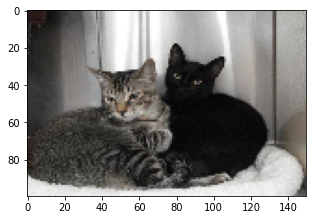

In [176]:
#get image size from dataset
img = load_img('training_set/training_set/cats/cat.8.jpg')  # this is a PIL image
x = img_to_array(img)
print(x.shape)
plt.figure(figsize=(5,5))
x = cv2.resize(x, (150, 100))
print(x.shape)
plt.imshow(x/255)

In [177]:
# train_datagen = ImageDataGenerator()
train_datagen = ImageDataGenerator( #Some little augmentations
    rescale=1./255,
    rotation_range=0.5, 
    shear_range=0.2,
    validation_split = 0.2, #20% of the data will be used as validation set
    zoom_range=0.3,
)

valid_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [178]:
train_generator = train_datagen.flow_from_directory(
        './training_set/training_set', 
        batch_size=64,
        shuffle=False,
        target_size = (x.shape[0], x.shape[1]),
        class_mode='categorical',
        subset='training')  
        

validation_generator = valid_datagen.flow_from_directory(
        './training_set/training_set', 
        batch_size=64,
        shuffle=False,
        target_size = (x.shape[0], x.shape[1]),
        class_mode='categorical',
        subset='validation')

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [179]:
new_input = Input(shape=(x.shape[0], x.shape[1], 3))

In [180]:
model =tf.keras.applications.VGG19(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(x.shape[0], x.shape[1], 3),
    pooling='max',
    classes=1,
    classifier_activation="sigmoid",
)

In [181]:
from keras.models import *
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam

In [182]:
input_shape = (x.shape[0], x.shape[1], 3)

In [183]:
# model = Sequential()
# model.add(Conv2D(128, (3, 3), padding='same', input_shape=(x.shape[0], x.shape[1], 3)))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(256, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(256, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(512, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(512, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(512, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(Conv2D(512, (3, 3), padding='same',))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten()) 
# model.add(Dense(4096))
# model.add(Activation('relu'))
# model.add(Dense(4096))
# model.add(Activation('relu'))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))



In [184]:
# def create_model(trainable_layer_count):
#     input_tensor = Input(shape=(img_size, img_size, 3))
#     base_model = ResNet50(include_top=False,
#                           #the weights value can apparently also be a file path..
#                    weights=None, #loading weights from dataset, avoiding need for internet conn
#                    input_tensor=input_tensor)
#     base_model.load_weights('../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
#     if trainable_layer_count == "all":
#         #the full pre-trained model is fine-tuned in this case
#         for layer in base_model.layers:
#             layer.trainable = True
#     else:
#         #if not all should be trainable, first set them all as non-trainable (fixed)
#         for layer in base_model.layers:
#             layer.trainable = False
#         #and finally set the last N layers as trainable
#         #idea is to re-use higher level features and fine-tune the finer details
#         for layer in base_model.layers[-trainable_layer_count:]:
#             layer.trainable = True
#     print("base model has {} layers".format(len(base_model.layers)))
#     #here on it is the fully custom classification on top of pre-trained layers above
#     x = GlobalAveragePooling2D()(base_model.output)
#     x = Dropout(0.5)(x)
#     x = Dense(1024, activation='relu', kernel_regularizer=l2(5e-4))(x)
#     x = Dropout(0.5)(x)
#     #doing binary prediction, so just 1 neuron is enough
#     final_output = Dense(1, activation='sigmoid', name='final_output')(x)
#     model = Model(input_tensor, final_output)
    
#     return model

In [185]:
#Still not talking about our train/test data or any pre-processing.

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = 'avg'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(2, activation = 'sigmoid'))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

In [186]:
#make model folder model
model._name = "CatNDogs_ResNet"
model_save_path = "./models/"
if not os.path.exists(model_save_path):
    os.mkdir(model_save_path)

In [187]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
checkpoint = ModelCheckpoint(os.path.join(model_save_path, model.name+".h5"), save_weights_only=True,
                             verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(patience=7, verbose=1, monitor='val_accuracy', mode='max')

In [188]:
model.compile(optimizer='adam', #Using Adam Optimizer
              loss="binary_crossentropy",   
              metrics=["accuracy"])

In [ ]:
%%time
history = model.fit(
        train_generator,
        validation_data = validation_generator,
        steps_per_epoch = int(train_generator.samples) // 64,
        epochs = 30,
        callbacks=[checkpoint, early_stop])

Epoch 1/30
100/100 [==============================] - 601s 6s/step - loss: 1.0998 - accuracy: 0.4238 - val_loss: 0.9025 - val_accuracy: 0.5003

Epoch 00001: val_accuracy improved from -inf to 0.50031, saving model to ./models/CatNDogs_ResNet.h5
Epoch 2/30
100/100 [==============================] - 552s 6s/step - loss: 0.8572 - accuracy: 0.5237 - val_loss: 1.2672 - val_accuracy: 0.4891

Epoch 00002: val_accuracy did not improve from 0.50031
Epoch 3/30
100/100 [==============================] - 553s 6s/step - loss: 0.7525 - accuracy: 0.5425 - val_loss: 1.3597 - val_accuracy: 0.5003

Epoch 00003: val_accuracy did not improve from 0.50031
Epoch 4/30
100/100 [==============================] - 552s 6s/step - loss: 0.7548 - accuracy: 0.5406 - val_loss: 1.9555 - val_accuracy: 0.5003

Epoch 00004: val_accuracy did not improve from 0.50031
Epoch 5/30
100/100 [==============================] - 553s 6s/step - loss: 0.9190 - accuracy: 0.5185 - val_loss: 0.8293 - val_accuracy: 0.5297

Epoch 00005: v

In [ ]:
!ls training_set/training_set/cats

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, color="blue", label="training acc")
plt.plot(epochs, val_acc, color="red", label="training val_acc")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy")
# plt.savefig(f"./balanced/models/{model._name}_f1_training_plot.jpg")
plt.show()

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, loss, color="blue", label="training loss")
plt.plot(epochs, val_loss, color="red", label="training val_loss")

plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training and Validation Loss")

plt.show()

In [ ]:

uploaded = files.upload()

filename = list(uploaded.keys())[0]

img = load_img(f"{dir}/{filename}", target_size=(x.shape[0], x.shape[1]))
plt.imshow(img)
img = img_to_array(img)

img = np.expand_dims(img, axis=0)/255

images = np.vstack([img])
classes = model.predict(images)
classes = classes.tolist()[0]
# print(classes)
label = classes.index(max(classes))
# print(label)
if label == 2:
  label = "Scissors"
elif label == 1:
  label = "Rock"
else:
  label = "Paper"

# print(label)

print(f"Hmmm... this is a {label}!")